##### Por hacer:

Crear más instancias

##### Cambios:

-Se modificó la función de utilidad por cierre de ciclos

-Se agregó variable cantidadMateriasIdeal

-disponibilidadComoRestriccion

-Ahora las cargas con dos materias de elección libre de los semestres 4 a 5 son inválidas.

-Función objetivo no calculaba bien los costos

In [1]:
import pandas as pd
import numpy as np
import pygad as pg
import time
import requests
import matplotlib.pyplot as plt

# Limpieza y preparación de los datos

## Lectura de datos

In [2]:
d16 = pd.read_csv('./datos/datos_2016.csv')
d17 = pd.read_csv('./datos/datos_2017.csv')
d18 = pd.read_csv('./datos/datos_2018.csv')
d19 = pd.read_csv('./datos/datos_2019.csv')
d2021 = pd.read_csv('./datos/2020_2021.csv')

In [3]:
asignaturas = pd.read_csv('asignaturas2.csv',encoding = 'ISO-8859-1')

In [4]:
plan_2016 = asignaturas.query('plan == "IDP2016"')

In [5]:
oferta = pd.read_csv('oferta_ideio.csv',encoding = 'ISO-8859-1')

In [6]:
seriaciones = pd.read_csv('seriacion.csv')

## Visualización de datos

In [7]:
d16.head()

,Unnamed: 0,carrera,periodo,clave,asignatura,promediofinal,docente,ceveval_global,ceneval_analitico,ceneval_matematico,...,r_modulo8,modulo9,r_modulo9,modulo10,r_modulo10,modulo11,r_modulo11,modulo12,r_modulo12,n_matricula
0,0,Negocios Internacionales,201601,DP0295,Taller de formación en responsabilidad social ...,10.0,Maldonado Saldaña / Gisela,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
1,1,Negocios Internacionales,201601,NI0215,Taller de software para negocios internacionales,9.0,Villeda Cuellar / Víctor Hugo,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
2,2,Negocios Internacionales,201601,LI1104,Nivel 4 Inglés,10.0,Ross / Andrew Patrick Simon,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
3,3,Negocios Internacionales,201601,NI0209,Administración financiera,6.0,Vallejo Filoteo / Jorge,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
4,4,Negocios Internacionales,201601,NI0213,Transporte y logística en comercio exterior,9.0,Cañedo Magaña / Magdalena del Carmen,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285


In [8]:
d2021.head()

,Unnamed: 0,Column1,programa,periodo,clave,asignatura,docente,promediofinal,ceveval_global,hrs_trabaja,n_matricula
0,0,1,Ingeniería en Datos e Inteligencia Organizacional,202001,IL0414,Taller de argumentación y técnicas de negociación,Torres Pérez / Rubén Juan,7.0,952.0,De 5 a 10 horas,170311163
1,1,2,Ingeniería en Datos e Inteligencia Organizacional,202001,II0422,Taller de emprendedores,Zapata Solís / Zuemy De Lourdes,8.0,1048.0,No trabajaba,180311454
2,2,3,Ingeniería en Datos e Inteligencia Organizacional,202001,DP0498,Problemas de México,Díaz Molina / Libertad Fidelina,9.0,1144.0,De 5 a 10 horas,170311232
3,3,4,Ingeniería en Datos e Inteligencia Organizacional,202001,IT0264,Introducción a los sistemas de información,Olivares González / Oscar,10.0,1072.0,De 11 a 15 horas,190311813
4,4,5,Ingeniería en Datos e Inteligencia Organizacional,202001,II0215,Electricidad y magnetismo,Ramírez Carmona / Leslye Johanna,7.0,1018.0,Más de 20 horas,180311416


In [9]:
asignaturas.head()

,ciclos,clave,nombre,creditos,tipo,plan,preespecialidad
0,1,II0106,Cálculo diferencial,8,Basica,IAP2019,NaN
1,1,II0209,Cálculo integral,6,Basica,IAP2019,NaN
2,1,DP0194,Desarrollo de habilidades del pensamiento,6,Basica,IAP2019,NaN
3,1,IA0106,Ecología,6,Basica,IAP2019,NaN
4,1,II0102,Física experimental,8,Basica,IAP2019,NaN


In [10]:
plan_2016.head()

,ciclos,clave,nombre,creditos,tipo,plan,preespecialidad
603,1,IT0101,Algoritmos y estructura de datos,6,Basica,IDP2016,NaN
604,1,II0106,Cálculo diferencial,8,Basica,IDP2016,NaN
605,1,II0209,Cálculo integral,6,Basica,IDP2016,NaN
606,1,DP0194,Desarrollo de habilidades del pensamiento,6,Basica,IDP2016,NaN
607,1,ID0101,Diseño de patrones para datos estructurados,6,Basica,IDP2016,NaN


In [11]:
oferta.head()

,ciclo,Trayectoria,Tipo,clave,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado
0,1,0,BAS,DP0193,Taller de redacción profesional,Alvarado Martínez / María Del Carmen,-,-,17:00-18:00,-,16:00-18:00,-
1,1,0,BAS,DP0191,Taller de interacción grupal y competencias co...,Diaz Barriga Cuevas / Claudia,-,-,-,15:00-17:00,17:00-18:00,-
2,1,0,BAS,DP0191,Taller de interacción grupal y competencias co...,Diaz Barriga Cuevas / Claudia,18:00-20:00,-,-,17:00-18:00,-,-
3,1,0,BAS,DP0193,Taller de redacción profesional,Parra Dorantes / Roberto,-,-,18:00-20:00,-,17:00-18:00,-
4,1,0,BAS,DP0194,Desarrollo de habilidades del pensamiento,Mendoza Luna / José Arturo,-,-,19:00-20:00,-,20:00-22:00,-


In [12]:
seriaciones.head()

,plan,ser1,ser2
0,IDP2016,II0106,II0209
1,IDP2016,ID0102,II0215
2,IDP2016,II0209,II0320
3,IDP2016,ID0103,IT0263
4,IDP2016,IT0264,ID0204


## Limpieza de datos

In [13]:
cargas16_19 = pd.concat([d16,d17,d18,d19])
cargas20_21 = d2021

In [14]:
cargas16_19 = cargas16_19.query('carrera == "Ingeniería en Datos e Inteligencia Organizacional"')

In [15]:
cargas16_19 = cargas16_19[['Unnamed: 0', 'carrera', 'periodo', 'clave', 'asignatura',
       'promediofinal', 'docente', 'ceveval_global', 'ceneval_analitico',
       'ceneval_matematico', 'ceneval_lengua', 'ceneval_esp',
       'n_matricula']]

In [16]:
matriculas16 = cargas16_19.query('n_matricula > 160000000 and n_matricula < 170000000')['n_matricula'].unique()
matriculas17 = cargas16_19.query('n_matricula > 170000000 and n_matricula < 180000000')['n_matricula'].unique()
matriculas18 = cargas16_19.query('n_matricula > 180000000 and n_matricula < 190000000')['n_matricula'].unique()
matriculas19 = cargas16_19.query('n_matricula > 190000000 and n_matricula < 200000000')['n_matricula'].unique()
matriculas20 = cargas20_21.query('n_matricula > 200000000 and n_matricula < 210000000')['n_matricula'].unique()
matriculas21 = cargas20_21.query('n_matricula > 210000000 and n_matricula < 220000000')['n_matricula'].unique()

In [17]:
matriculas = np.concatenate((matriculas16, matriculas17,matriculas18,matriculas19,matriculas20,matriculas21))

In [18]:
cargas20_21 = cargas20_21.rename(columns={'programa': 'carrera'})

In [19]:
formato_cargas20_21 = cargas20_21[['carrera', 'periodo', 'clave', 'asignatura','docente','n_matricula','promediofinal']]
formato_cargas16_19 = cargas16_19[['carrera', 'periodo', 'clave', 'asignatura','docente','n_matricula','promediofinal']]

formato_cargas = pd.concat([formato_cargas16_19,formato_cargas20_21])

In [20]:
oferta = oferta[['clave','Nombre', 'Maestro', 'Lunes','Martes', 'Miercoles', 'Jueves', 'Viernes']]

In [21]:
oferta = oferta.drop_duplicates()

In [22]:
oferta['Lunes'].unique()

array(['-', '18:00-20:00', '17:00-19:00', '20:00-22:00', '15:00-17:00',
       '9:00-11:00', '19:00-21:00', '19:00-20:00', '7:00-9:00',
       '11:00-13:00', '13:00-14:00', '16:00-18:00', '14:00-16:00',
       '7:00-10:00', '7:00-8:00', '16:00-19:00', '21:00-22:00',
       '16:00-17:00'], dtype=object)

In [23]:
oferta['Martes'].unique()

array(['-', '15:00-17:00', '20:00-21:00', '20:00-22:00', '19:00-20:00',
       '16:00-18:00', '18:00-19:00', '7:00-9:00', '9:00-11:00',
       '18:00-20:00', '14:00-16:00', '13:00-15:00', '8:00-9:00'],
      dtype=object)

In [24]:
oferta['Miercoles'].unique()

array(['17:00-18:00', '-', '18:00-20:00', '19:00-20:00', '16:00-17:00',
       '15:00-17:00', '20:00-21:00', '20:00-22:00', '18:00-19:00',
       '12:00-14:00', '7:00-9:00', '9:00-11:00', '11:00-12:00',
       '11:00-13:00', '\n13:00-15:00', '13:00-15:00', '17:00-19:00',
       '19:00-21:00', '15:00-16:00', '12:00-13:00', '8:00-10:00',
       '7:00-8:00', '10:00-12:00', '16:00-18:00', '14:00-15:00'],
      dtype=object)

In [25]:
oferta['Jueves'].unique()

array(['-', '15:00-17:00', '17:00-18:00', '20:00-21:00', '16:00-17:00',
       '9:00-10:00', '20:00-22:00', '18:00-20:00', '19:00-21:00',
       '7:00-8:00', '13:00-14:00', '8:00-9:00', '9:00-11:00',
       '16:00-18:00', '14:00-15:00', '13:00-15:00', '7:00-9:00',
       '15:00-16:00', '18:00-19:00', '19:00-20:00', '21:00-22:00'],
      dtype=object)

In [26]:
oferta['Viernes'].unique()

array(['16:00-18:00', '17:00-18:00', '-', '20:00-22:00', '15:00-17:00',
       '14:00-15:00', '18:00-20:00', '20:00-21:00', '13:00-14:00',
       '9:00-10:00', '7:00-9:00', '10:00-11:00', '16:00-17:00',
       '14:00-16:00', '18:00-19:00', '8:00-10:00', '19:00-20:00',
       '19:00-21:00'], dtype=object)

In [27]:
oferta.loc[36,'Miercoles'] = '13:00-15:00'

In [28]:
oferta['Miercoles'].unique()

array(['17:00-18:00', '-', '18:00-20:00', '19:00-20:00', '16:00-17:00',
       '15:00-17:00', '20:00-21:00', '20:00-22:00', '18:00-19:00',
       '12:00-14:00', '7:00-9:00', '9:00-11:00', '11:00-12:00',
       '11:00-13:00', '13:00-15:00', '17:00-19:00', '19:00-21:00',
       '15:00-16:00', '12:00-13:00', '8:00-10:00', '7:00-8:00',
       '10:00-12:00', '16:00-18:00', '14:00-15:00'], dtype=object)

In [29]:
def formatoHora(hora):
    if len(hora) == 11:
        return hora
    elif len(hora) == 10:
        return '0' + hora
    elif len(hora) == 9:
        return '0' + hora[0:5] + '0' + hora[5:]
    elif len(hora) == 1:
        return '-'

In [30]:
oferta['Lunes'] = oferta['Lunes'].apply(lambda horas: formatoHora(horas))
oferta['Martes'] = oferta['Martes'].apply(lambda horas: formatoHora(horas))
oferta['Miercoles'] = oferta['Miercoles'].apply(lambda horas: formatoHora(horas))
oferta['Jueves'] = oferta['Jueves'].apply(lambda horas: formatoHora(horas))
oferta['Viernes'] = oferta['Viernes'].apply(lambda horas: formatoHora(horas))

# Definición de funciones útiles

## Función para obtener un Kardex aleatorio

In [31]:
def obtenerKardex(mat = -1):
    if(mat == -1):
        mat = np.random.choice(matriculas)
    return formato_cargas.query('n_matricula == ' + str(mat)).sort_values('periodo')

In [32]:
def obtenerCreditos(kardex):
    claves = kardex.query('promediofinal >= 7')['clave'].unique()
    totalCreditos = 0
    for clave in claves:
        if(clave[0:2] == 'LI' or clave[0:2] == 'TA' or clave[0:2] == 'AD'):
            continue
        totalCreditos += plan_2016.query('clave == "' + clave + '"')['creditos'].values[0]
    return totalCreditos

## Obtención de oferta útil

En este sección se crea la función "obtenerOfertaUtil" la cual filtra la oferta académica para eliminar las materias que no cumplen con la restricción de llevar materias aprobadas y la restricción de llevar materias que no respeten la seriación.

In [33]:
def materiaHaSidoAprobada(kardex,clave):
    if len(kardex.query('clave == "' + clave + '" and promediofinal >= 7')) == 0:
        return False
    else:
        return True

In [34]:
def respetaSeriacion(clave,kardex):
    if len(seriaciones.query('ser2 == "' + clave + '"')) == 0:
        return True
    else:
        #Se guarda en necesarias la lista de asignaturas necesarias para llevar la asignura "clave"
        necesarias = seriaciones.query('ser2 == "' + clave + '"')['ser1'].unique()
        
        #Se recorre la lista para comprobar si el estudiante ya pasó las asignaturas necesarias, en caso de que le falte 
        #al menos una, entonces no se respeta la seriación.
        for necesaria in necesarias:
            if not(materiaHaSidoAprobada(kardex,necesaria)):
                return False
        return True

In [35]:
#Filtra las materias que no cumplen las restricciones 1 y 2

def obtenerOfertaUtil(kardex,oferta):
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    
    #Se eliminan las materias en la oferta que ya han sido aprobadas
    aprobadas = kardex.query('promediofinal >= 7')['clave'].unique()
    for clave in aprobadas:
        oferta = oferta.query('clave != "' + clave + '"')
        
    #Se eliminan las materias que el alumno no puede llevar por la seriación
    ofertaUtilIndex = set(oferta.index.values)
    for idx in oferta.index:
        if not(respetaSeriacion(oferta.loc[idx]['clave'],kardex)):
            ofertaUtilIndex.remove(idx)
            
    #Se eliminan prácticas profesionales y proyecto terminal
    for i in range(len(oferta['clave'].values)):
        clave = oferta['clave'].values[i]
        if clave[0:3] == 'PID' or clave == 'IT0427':
            try:
                ofertaUtilIndex.remove(oferta.index.values[i])
            except:
                continue
    ofertaUtil = oferta.loc[list(ofertaUtilIndex)]
    
    ofertaUtil = pd.merge(ofertaUtil,plan_2016,how='left',on='clave')[['clave','ciclos','Nombre','Maestro','Lunes','Martes','Miercoles','Jueves','Viernes']]
    
    #Se eliminan materias de elección libre de primer y segundo ciclo
    if(materiaHaSidoAprobada(kardex,'IL0102')):
        ofertaUtil = ofertaUtil.query('clave != "ID0160"')
    if(materiaHaSidoAprobada(kardex,'ID0160')):
        ofertaUtil = ofertaUtil.query('clave != "IL0102"')
    
    if(materiaHaSidoAprobada(kardex,'IT0103')):
        ofertaUtil = ofertaUtil.query('clave != "ID0161"')
    if(materiaHaSidoAprobada(kardex,'ID0161')):
        ofertaUtil = ofertaUtil.query('clave != "IT0103"')
        
    if(materiaHaSidoAprobada(kardex,'ID0264')):
        ofertaUtil = ofertaUtil.query('clave != "ID0262"')
    if(materiaHaSidoAprobada(kardex,'ID0262')):
        ofertaUtil = ofertaUtil.query('clave != "ID0264"')
        
    if(materiaHaSidoAprobada(kardex,'ID0263')):
        ofertaUtil = ofertaUtil.query('clave != "ID0265"')
    if(materiaHaSidoAprobada(kardex,'ID0265')):
        ofertaUtil = ofertaUtil.query('clave != "ID0263"')
        
    #Si la disponibilidad de horario es una restricción, entonces elimina las materias que violen la restricción
    if(disponibilidadComoRestriccion):
        indices = set(ofertaUtil.index)
        indicesUtiles = indices.copy()
        for dia in dias:
            for i in indices:
                if ofertaUtil.loc[i][dia] == '-':
                    continue
                
                horaInicio = int(ofertaUtil.loc[i][dia][0:2])
                horaFin = int(ofertaUtil.loc[i][dia][6:8])
                
                for hora in range(horaInicio,horaFin):
                    if not(disponibilidad.query('hora == ' + str(hora))[dia].values[0]):
                        if i in indicesUtiles:
                            indicesUtiles.remove(i)
        indicesUtiles = list(indicesUtiles)
        ofertaUtil = ofertaUtil.loc[indicesUtiles]
    
    return ofertaUtil

## Generación de carga aleatoria válida

En esta sección creamos las funciones "generarCargaValida" la cual retorna una string de bits representando una carga académica con base a la oferta útil. También se crea la función "obtenerDatosCarga" que nos ayuda a obtener los datos de una carga académica con base a la oferta útil y a una string de bits que denominamos "bits de carga"

In [36]:
def generarSolucionAleatoria(ofertaUtil):
    solucion = [-1] * 9
    for i in range(9):
        gen = np.random.randint(-1,len(ofertaUtil))
        if gen == -1:
            solucion[i] = -1
        else:
            solucion[i] = ofertaUtil.index[gen]
    return solucion

In [37]:
def obtenerDatosCarga(solucion,ofertaUtil):
    solucionU = np.array(solucion)
    solucionU = np.unique(solucionU)
    solucionU = solucionU[solucionU >= 0]
    
    return ofertaUtil.loc[solucionU]

In [38]:
def comprobarTraslapacion(solucion,ofertaUtil):
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    
    for dia in dias:
        horarioDia = datosCarga.sort_values(dia)[dia].values
        for i in range(len(horarioDia)):
            if horarioDia[i] == '-':
                continue
            horaInicioI = int(horarioDia[i][0:2])
            horaFinI = int(horarioDia[i][6:8])
            
            for j in range(i+1,len(horarioDia)):
                horaInicioJ = int(horarioDia[j][0:2])
                horaFinJ = int(horarioDia[j][6:8])
                
                if not(horaFinJ  <= horaInicioI or horaInicioJ >= horaFinI):
                    return True
    return False

In [174]:
def esValido(solucion,ofertaUtil):
    #Si se repite una materia es inválido
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    if len(datosCarga['clave'].unique()) < len(datosCarga):
        return False
    #Si se traslapan dos materias es inválido
    if comprobarTraslapacion(solucion,ofertaUtil):
        return False
    #Si son menos de 3 materias es inválido
    solucionSet = set(solucion)
    if -1 in solucionSet:
        solucionSet.remove(-1)
    if(len(solucionSet)<3):
        return False
    
    #Si se llevan dos materias de elección libre del ciclo 1 y 2
    clavesSet = set(datosCarga['clave'])
    
    if 'IL0102' in clavesSet and 'ID0160' in clavesSet:
        return False
    if 'IT0103' in clavesSet and 'ID0161' in clavesSet:
        return False
    if 'ID0264' in clavesSet and 'ID0262' in clavesSet:
        return False
    if 'ID0263' in clavesSet and 'ID0265' in clavesSet:
        return False
    
    return True

In [166]:
carga = generarSolucionValida(ofertaUtil)

In [167]:
carga

[22, 22, 9, 15, 2, 11, 58, 28, 2]

In [40]:
def generarSolucionValida(ofertaUtil):
    bitsDeCarga = generarSolucionAleatoria(ofertaUtil)
    
    while not(esValido(bitsDeCarga,ofertaUtil)):
        bitsDeCarga = generarSolucionAleatoria(ofertaUtil)
    
    return bitsDeCarga

In [41]:
def obtenerHorario(carga,ofertaUtil):
    primeraHoraMinima = 24
    ultimaHoraMaxima = 0
    datosCarga = obtenerDatosCarga(carga,ofertaUtil)
    horario = pd.DataFrame({
        'Hora': ['7:00-8:00','8:00-9:00','9:00-10:00','10:00-11:00','11:00-12:00','12:00-13:00','13:00-14:00','14:00-15:00','15:00-16:00','16:00-17:00','17:00-18:00','18:00-19:00','19:00-20:00','20:00-21:00','21:00-22:00'],
        'Lunes': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Martes': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Miercoles': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Jueves': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Viernes': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
    })
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    for dia in dias:
        for i in range(len(datosCarga)):
            if datosCarga[dia].iloc[i] == '-':
                continue

            horaInicio = int(datosCarga.iloc[i][dia][0:2])
            horaFin = int(datosCarga.iloc[i][dia][6:8])
            
            primeraHoraMinima = min(primeraHoraMinima,horaInicio)
            ultimaHoraMaxima = max(ultimaHoraMaxima,horaFin)
            
            nombre = datosCarga.iloc[i]['Nombre']

            for hora in range(horaInicio,horaFin):
                horario.loc[hora-7,dia]=nombre
    return horario[(primeraHoraMinima-7):(ultimaHoraMaxima-6)]

# Definición de funciones de utilidad y de costo

## Utilidad de carga académica con base en cantidad ideal de materias

In [43]:
def UpCM(solucion):
    separacionMaxima = max(cantidadMateriasIdeal-3,9-cantidadMateriasIdeal)
    
    solucionSet = set(solucion)
    if -1 in solucionSet:
        solucionSet.remove(-1)
    tamanoCarga = len(solucionSet)
    
    separacion = abs(tamanoCarga-cantidadMateriasIdeal)
    
    return 1 - (separacion / separacionMaxima)

## Utilidad de carga académica con base en las materias reprobadas

In [44]:
def obtenerMateriasReprobadas(kardex):
    materiasReprobadas = kardex.query('promediofinal < 7')['clave'].unique()
    materiasReprobadasFinal = []
    for clave in materiasReprobadas:
        aprobado = len(kardex.query('clave == "' + clave + '" and promediofinal >= 7'))
        if aprobado == 0:
            materiasReprobadasFinal.append(clave)
    return materiasReprobadasFinal

In [45]:
def UpMR(kardex,solucion,ofertaUtil):
    materiasReprobadas = obtenerMateriasReprobadas(kardex)
    if len(materiasReprobadas) == 0:
        return 0
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    utilidadTotal = 0
    
    for clave in materiasReprobadas:
        cargado = len(datosCarga.query('clave == "' + clave + '"'))
        if cargado == 1:
            utilidadTotal += 1
            
    
    #Normalización
    utilidad = (utilidadTotal)/(len(materiasReprobadas))
    return utilidad

## Utilidad de carga académica con base en el cierre de ciclos

In [46]:
def UpCC(solucion,ofertaUtil):
    alpha = 3
    utilidad = [alpha**3,alpha**2,alpha,1]
    utilidadTotal = 0
    
    menorCiclo = min(ofertaUtil['ciclos']) - 1
    
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    
    claves = datosCarga['clave'].unique()
    for i in range(len(claves)):
        if claves[i][0:2] == 'AD'or claves[i][0:2] == 'TA' or claves[i][0:2] == 'LI' or claves[i][0:2] == 'PI':
            continue
            
        ciclo = int(plan_2016.query('clave == "' + claves[i] + '"')['ciclos']) - 1
        utilidadTotal += utilidad[ciclo - menorCiclo]
    
    utilidadMaxima = 0
    cantidadMateriasCiclo1 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+1))['clave'].unique())
    cantidadMateriasCiclo2 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+2))['clave'].unique())
    cantidadMateriasCiclo3 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+3))['clave'].unique())
    cantidadMateriasCiclo4 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+4))['clave'].unique())
    cantidadMateriasMaxima = 9
    
    m1 = m2 = m3 = m4 = 0
    
    if (cantidadMateriasMaxima - cantidadMateriasCiclo1) >= 0:
        m1 = cantidadMateriasCiclo1
        cantidadMateriasMaxima -= cantidadMateriasCiclo1
    else:
        m1 = 9
        cantidadMateriasMaxima = 0
    if (cantidadMateriasMaxima - cantidadMateriasCiclo2) >= 0:
        m2 = cantidadMateriasCiclo2
        cantidadMateriasMaxima -= cantidadMateriasCiclo2
    elif cantidadMateriasMaxima > 0:
        m2 = cantidadMateriasMaxima
        cantidadMateriasMaxima = 0
    if (cantidadMateriasMaxima - cantidadMateriasCiclo3) >= 0:
        m3 = cantidadMateriasCiclo3
        cantidadMateriasMaxima -= cantidadMateriasCiclo3
    elif cantidadMateriasMaxima > 0:
        m3 = cantidadMateriasMaxima
        cantidadMateriasMaxima = 0
    if (cantidadMateriasMaxima - cantidadMateriasCiclo4) >= 0:
        m4 = cantidadMateriasCiclo4
        cantidadMateriasMaxima -= cantidadMateriasCiclo4
    elif cantidadMateriasMaxima > 0:
        m4 = cantidadMateriasMaxima
        cantidadMateriasMaxima = 0
        
    
    utilidadMaxima = m1*utilidad[0] + m2*utilidad[1] + m3*utilidad[2] + m4*utilidad[3]
 
    #Normalización
    utilidadNorm = (utilidadTotal)/(utilidadMaxima)
    return utilidadNorm

## Costo de carga académica con base en las horas libres

#### NOTA: Tomar en cuenta las horas libres por día

In [47]:
    def CpHL(solucion,ofertaUtil):
        dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
        costoTotal = 0
        hlMax = 0

        datosCarga = obtenerDatosCarga(solucion,ofertaUtil)

        for dia in dias:
            datosCarga = datosCarga.sort_values(dia)
            if datosCarga[dia].iloc[len(datosCarga)-2] == '-':
                continue

            ultimaHoraFin = 0
            for i in range(len(datosCarga)):
                if datosCarga.iloc[i][dia] == '-':
                    continue
                if ultimaHoraFin == 0:
                    ultimaHoraFin = int(datosCarga.iloc[i][dia][6:8])
                    primeraHoraDia = int(datosCarga.iloc[i][dia][0:2])
                    continue
                horaInicio = int(datosCarga.iloc[i][dia][0:2])
                costoTotal += (horaInicio - ultimaHoraFin)
                ultimaHoraFin = int(datosCarga.iloc[i][dia][6:8])
            hlMax += (ultimaHoraFin - primeraHoraDia - 2)

        if hlMax == 0:
            return 0
        #Normalización
        costo = (costoTotal)/(hlMax)
        return costo

## Costo de carga académica con base en la disponibilidad de horario del estudiante

Creamos 4 casos diferentes donde los estudiantes trabajan. Guardamos el horario de ocupación de los estudiantes en un dataframe por cada estudiante.

In [48]:
# El estudiante trabaja por las mañanas tiempo completo
disp_est_1 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Martes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Miercoles": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Jueves": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Viernes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
})


# El estudiante trabaja por las tardes tiempo completo
disp_est_2 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Martes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Miercoles": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Jueves": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Viernes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
})

# El estudiante trabaja por las mañanas medio tiempo
disp_est_3 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Martes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Miercoles": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Jueves": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Viernes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
})
# El estudiante trabaja por las tardes medio tiempo
disp_est_4 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Martes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Miercoles": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Jueves": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Viernes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
})
disp_est_5 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Martes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Miercoles": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Jueves": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Viernes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
})

In [49]:
disponibilidadArr = [disp_est_1,disp_est_2,disp_est_3,disp_est_4,disp_est_5]

In [50]:
def CpDH(solucion,ofertaUtil,disponibilidad):
    disponibilidadTotal = sum(disponibilidad['Lunes']) + sum(disponibilidad['Martes']) + sum(disponibilidad['Miercoles'])
    if disponibilidadTotal == 90:
        return 0
    
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    costoTotal = 0

    for dia in dias:
        for i in range(len(datosCarga)):
            if datosCarga[dia].iloc[i] == '-':
                continue

            horaInicio = int(datosCarga.iloc[i][dia][0:2])
            horaFin = int(datosCarga.iloc[i][dia][6:8])

            for hora in range(horaInicio,horaFin):
                if not(disponibilidad.query('hora == ' + str(hora))[dia].values[0]):
                    costoTotal += 1
                    
    #Normalización
    costo = (costoTotal)/(90 - disponibilidadTotal)
    return costo

# Definición de la función de desempeño

In [229]:
def obtenerDesempeno(solucion,cromosomaIndice):
    if not(esValido(solucion,ofertaUtil)):
        return 0
    pesos = np.array([2,1,1,2.5,1])   
    
    upcc = UpCC(solucion,ofertaUtil)
    upmr = UpMR(kardex,solucion,ofertaUtil)
    if cantidadMateriasIdeal > 0:
        upcm = UpCM(solucion)
    else:
        upcm = 0
    cpdh = CpDH(solucion,ofertaUtil,disponibilidad)
    cphl = CpHL(solucion,ofertaUtil)
    
    x = np.array([upcc,upmr,upcm,cpdh,cphl])
    x = x*pesos
    
    x[3] =  pesos[3]- x[3]
    x[4] = pesos[4] - x[4]
    
    return sum(x)

In [194]:
def evaluarSolucion(solucion):
    pesos = np.array([1,1,1,1])   
    
    upcc = UpCC(solucion,ofertaUtil)
    upmr = UpMR(kardex,solucion,ofertaUtil)
    upcm = UpCM(solucion)
    cpdh = CpDH(solucion,ofertaUtil,disponibilidad)
    cphl = CpHL(solucion,ofertaUtil)
    
    print("La carga evaluada tiene:")
    print("\t" + str(round(100*upcc,2)) + "% de utilidad por las materias de primeros ciclos llevadas.")
    print("\t" + str(round(100*upmr,2)) + "% del total de las materias reprobadas del estudiante.") 
    print("\t" + str(round(100*upcm,2)) + "% de utilidad por cantidad ideal de materias del estudiante.") 
    print("\t" + str(round(100*cpdh,2)) + "% de costo por sobreposición con las horas donde el estudiante no está disponible.")
    print("\t" + str(round(100*cphl,2)) + "% de costo por el total de horas libres por día.")

In [89]:
def on_generation(ga_instance):
    print("Generación: " + str(ga_instance.generations_completed))

### Problemas a solucionar:

-Función de horas libres no toma en cuenta el promedio de horas libres por día (Hacer otra función?)

-Arreglar costo por horas libres, regresa valores negativos

# Algoritmos evolutivos

## Análisis cualitativo

## Eddie (2do semestre)

La oferta ideal son todas las materias que se ofertan para el  primer ciclo.

In [236]:
disponibilidadComoRestriccion = False
disponibilidad = disponibilidadArr[4] #Disponibilidad completa de horario

kardex = obtenerKardex(190311499).query('periodo < 202101')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 7

In [237]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan_2016.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))


Creditos: 146


In [238]:
len(ofertaUtil)

65

In [239]:
instancia1 = pg.GA(num_generations=20,
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

Generación: 1
Generación: 2
Generación: 3
Generación: 4
Generación: 5
Generación: 6
Generación: 7
Generación: 8
Generación: 9
Generación: 10
Generación: 11
Generación: 12
Generación: 13
Generación: 14
Generación: 15
Generación: 16
Generación: 17
Generación: 18
Generación: 19
Generación: 20
Proceso terminado en 568.8459951877594


In [240]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
2,ID0204,2,Bases de Datos,Lara Peraza / Wilberth Eduardo,09:00-11:00,-,09:00-11:00,-,-
4,ID0206,2,Interconectividad en redes,Sansores Pérez / Candelaria Elizabeth,11:00-13:00,-,11:00-13:00,-,-
8,IL0204,2,Estadística analítica,Cruz Pichardo / Felisa,07:00-09:00,-,07:00-09:00,-,-
9,DP0396,2,Identidad y cultura,Alavez San Pedro / Minerva,-,16:00-18:00,-,-,16:00-17:00
13,ID0263,2,Sistemas de planificación de recursos empresar...,Báez López / Yarely,16:00-18:00,-,16:00-17:00,-,-
16,ID0205,2,Geometría computacional,Naredo García / Enrique,-,14:00-16:00,-,14:00-15:00,-
40,IT0425,3,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-


In [241]:
evaluarSolucion(solution)

La carga evaluada tiene:
	76.0% de utilidad por las materias de primeros ciclos llevadas.
	0% del total de las materias reprobadas del estudiante.
	100.0% de utilidad por cantidad ideal de materias del estudiante.
	0.0% de costo por sobreposición con las horas donde el estudiante no está disponible.
	15.79% de costo por el total de horas libres por día.


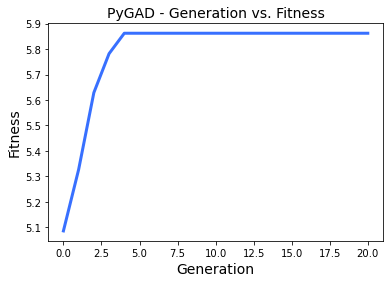

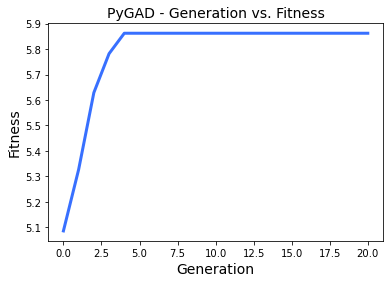

In [242]:
instancia1.plot_fitness()

In [243]:
solution_fitness

5.862105263157894

In [244]:
obtenerHorario(solution,ofertaUtil)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
0,7:00-8:00,Estadística analítica,-,Estadística analítica,-,-
1,8:00-9:00,Estadística analítica,-,Estadística analítica,-,-
2,9:00-10:00,Bases de Datos,-,Bases de Datos,-,-
3,10:00-11:00,Bases de Datos,-,Bases de Datos,-,-
4,11:00-12:00,Interconectividad en redes,-,Interconectividad en redes,-,-
5,12:00-13:00,Interconectividad en redes,-,Interconectividad en redes,-,-
6,13:00-14:00,-,-,-,-,-
7,14:00-15:00,Introducción a la inteligencia artificial,Geometría computacional,Introducción a la inteligencia artificial,Geometría computacional,-
8,15:00-16:00,Introducción a la inteligencia artificial,Geometría computacional,-,-,-
9,16:00-17:00,Sistemas de planificación de recursos empresar...,Identidad y cultura,Sistemas de planificación de recursos empresar...,-,Identidad y cultura


In [246]:
evaluarSolucion([1,2,3,4,6,7,8])

La carga evaluada tiene:
	84.0% de utilidad por las materias de primeros ciclos llevadas.
	0% del total de las materias reprobadas del estudiante.
	100.0% de utilidad por cantidad ideal de materias del estudiante.
	0.0% de costo por sobreposición con las horas donde el estudiante no está disponible.
	0.0% de costo por el total de horas libres por día.


In [245]:
obtenerDesempeno([1,2,3,4,6,7,8],0)

6.18

In [185]:
evaluarSolucion(solution)

La carga evaluada tiene:
	84.0% de utilidad por las materias de primeros ciclos llevadas.
	0% del total de las materias reprobadas del estudiante.
	22.22% de utilidad por cantidad ideal de materias del estudiante.
	0.0% de costo por sobreposición con las horas donde el estudiante no está disponible.
	58.82% de costo por el total de horas libres por día.


In [196]:
obtenerDesempeno(solution,0)

3.7517647058823527

## Valeria

In [53]:
disponibilidad = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [False,False,True,True,True,True,True,False,False,False,False,False,False,False,False],
    "Martes": [False,False,True,True,True,True,True,False,False,False,False,False,False,False,False],
    "Miercoles": [False,False,True,True,True,True,True,False,False,False,False,False,False,False,False],
    "Jueves": [False,False,True,True,True,True,True,False,False,False,False,False,False,False,False],
    "Viernes": [False,False,True,True,True,True,True,False,False,False,False,False,False,False,False],
}) 


In [54]:
disponibilidadComoRestriccion = False

kardex = pd.read_csv('./kardex/GUZMAN_VALERIA_KARDEX.csv')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 9

In [55]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan_2016.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

ID0205 Geometría computacional
ID0309 Aprendizaje estadístico

Creditos: 228


In [56]:
len(ofertaUtil)

33

In [57]:
instancia1 = pg.GA(num_generations=20,
                   num_parents_mating=10,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]))
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

Proceso terminado en 724.6008453369141


In [58]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
5,ID0205,2,Geometría computacional,Naredo García / Enrique,-,14:00-16:00,-,14:00-15:00,-
10,ID3416,3,Diseño multimedia,Landeros Alvarado / Aurea,-,08:00-09:00,-,09:00-11:00,-
13,IT0263,3,Electrónica analógica,Casas De La Cruz / Rosa Guadalupe,13:00-14:00,-,10:00-12:00,-,-
14,ID0310,3,Minería de datos,Gómez García / Hector Fernando,-,-,16:00-18:00,-,16:00-18:00
15,ID3422,3,Negocios digitales,Rodríguez Santiago / Juan Manuel,-,18:00-20:00,-,18:00-19:00,-
19,IT0425,3,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-
20,IT0317,4,Diseño de interfaces humano-máquina,Morales Saavedra / Emmanuel,-,-,15:00-16:00,-,14:00-16:00
21,ID0309,3,Aprendizaje estadístico,Arzápalo Treviño / Ángel Alejandro,-,09:00-11:00,-,07:00-08:00,-
22,ID3424,4,Visualización de datos,Mendiola Fuentes / Jessica Carmin,07:00-08:00,-,-,-,07:00-09:00


In [59]:
evaluarSolucion(solution)

La carga evaluada tiene:
	100.0% de utilidad por las materias de primeros ciclos llevadas.
	100.0% del total de las materias reprobadas del estudiante.
	100.0% de utilidad por cantidad ideal de materias del estudiante.
	28.0% de costo por sobreposición con las horas donde el estudiante no está disponible.
	57.14% de costo por el total de horas libres por día.


In [60]:
obtenerHorario(solution,ofertaUtil)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
0,7:00-8:00,Visualización de datos,-,-,Aprendizaje estadístico,Visualización de datos
1,8:00-9:00,-,Diseño multimedia,-,-,Visualización de datos
2,9:00-10:00,-,Aprendizaje estadístico,-,Diseño multimedia,-
3,10:00-11:00,-,Aprendizaje estadístico,Electrónica analógica,Diseño multimedia,-
4,11:00-12:00,-,-,Electrónica analógica,-,-
5,12:00-13:00,-,-,-,-,-
6,13:00-14:00,Electrónica analógica,-,-,-,-
7,14:00-15:00,Introducción a la inteligencia artificial,Geometría computacional,Introducción a la inteligencia artificial,Geometría computacional,Diseño de interfaces humano-máquina
8,15:00-16:00,Introducción a la inteligencia artificial,Geometría computacional,Diseño de interfaces humano-máquina,-,Diseño de interfaces humano-máquina
9,16:00-17:00,-,-,Minería de datos,-,Minería de datos


In [61]:
ofertaUtil['ciclos'].unique()

array([2, 4, 3], dtype=int64)